In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

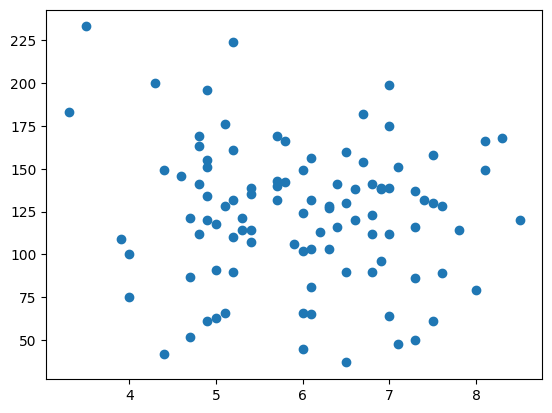

In [ ]:
plt.scatter(df['cgpa'],df['iq'])

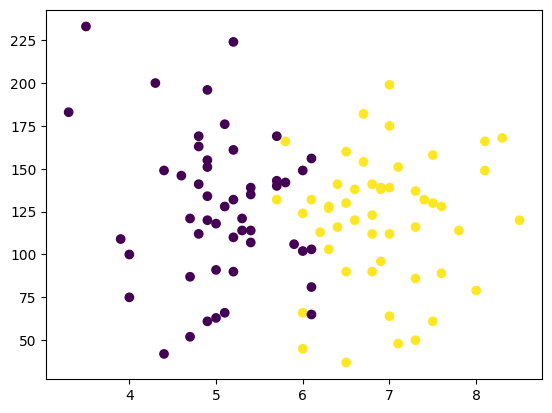

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,:2]
Y= df.iloc[:,-1]

In [ ]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
Y.head()


,placement
0,1
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y =train_test_split(X,Y,test_size=0.1)

In [ ]:
train_x

,cgpa,iq
68,4.0,75.0
62,6.0,102.0
99,6.2,113.0
13,6.4,116.0
80,4.9,196.0
...,...,...
20,6.6,120.0
87,5.7,132.0
34,4.8,163.0
16,5.2,224.0


In [ ]:
train_y

,placement
68,0
62,0
99,1
13,1
80,0
...,...
20,1
87,1
34,0
16,0


In [ ]:
test_x

,cgpa,iq
52,7.0,175.0
8,6.1,156.0
50,3.5,233.0
69,8.5,120.0
51,4.8,141.0
24,4.7,121.0
3,7.4,132.0
35,6.8,90.0
30,7.6,128.0
38,6.5,160.0


In [ ]:
test_y

,placement
52,1
8,0
50,0
69,1
51,0
24,0
3,1
35,1
30,1
38,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
train_x = scaler.fit_transform(train_x)

In [ ]:
train_x

array([[-1.79318941, -1.17438192],
       [ 0.03867264, -0.48706302],
       [ 0.22185885, -0.20704421],
       [ 0.40504506, -0.13067544],
       [-0.96885149,  1.905825  ],
       [-0.69407218,  1.01485605],
       [-0.78566528,  1.39669989],
       [ 1.9621278 ,  0.70938099],
       [ 1.04619678, -1.86170082],
       [ 0.86301057, -0.63980055],
       [ 0.86301057,  0.42936218],
       [ 0.03867264,  0.0729746 ],
       [ 0.58823126,  0.42936218],
       [-0.69407218, -0.28341298],
       [-1.426817  ,  0.70938099],
       [-0.05292046, -0.385238  ],
       [ 0.77141747,  0.04751834],
       [ 0.31345195,  0.14934337],
       [-0.96885149, -1.5307695 ],
       [ 0.67982436,  0.83666226],
       [-0.51088597,  0.35299341],
       [-0.23610667,  1.2185061 ],
       [-0.14451356,  0.5311872 ],
       [ 0.77141747,  0.50573094],
       [ 1.22938298, -0.13067544],
       [-1.79318941, -0.53797553],
       [-1.06044459,  1.2185061 ],
       [-1.51841011,  2.00765002],
       [ 0.95460367,

In [ ]:
test_x = scaler.transform(test_x)

In [ ]:
test_x

array([[ 0.95460367,  1.37124363],
       [ 0.13026575,  0.88757478],
       [-2.25115493,  2.84770645],
       [ 2.32850022, -0.02885042],
       [-1.06044459,  0.50573094],
       [-1.15203769, -0.00339417],
       [ 1.32097608,  0.27662464],
       [ 0.77141747, -0.79253809],
       [ 1.50416229,  0.17479962],
       [ 0.49663816,  0.9893998 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(train_x,train_y)

LogisticRegression()

In [ ]:
ypred =clf.predict(test_x)

In [ ]:
test_y

,placement
52,1
8,0
50,0
69,1
51,0
24,0
3,1
35,1
30,1
38,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_y,ypred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

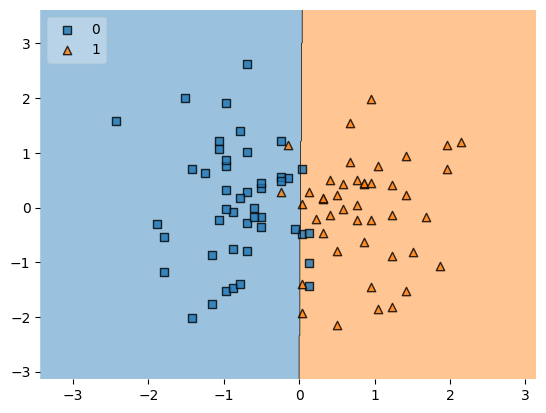

In [ ]:
plot_decision_regions(train_x,train_y.values, clf=clf ,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('placement.pkl','wb'))